## Stochastic Discount Factor

Calculate μM and σM for each value of γ, and plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).

Find the smallest value of γ (in your data) for which σM/μM > 0.4. Explain (in words, without using any mathematical  equations or formulas) the economic significance of this result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Calculate consumption growth based on 10000 number simulation

In [2]:
# with monte carlo simulation. Define 10000 number of simulation.
# simulate epsilon (ε) with (at least) 104 random draws from standard normal distribution
# simulate nu (ν) with (at least) 104 random draws from standard uniform distribution.
# if the nu is <0.017, value = ln(0.65) else 0

num_simulation = 10000
consumption_growth = np.zeros(num_simulation)
for i in range(num_simulation):
    mu, sigma = 0,1
    epsilon = np.random.standard_normal()
    prob_nu = np.random.uniform(0,1)
    if prob_nu <0.017:
        nu = np.log(0.65)
    else:
        nu = 0
    consumption_growth[i] = np.exp(0.02 + 0.02*epsilon + nu)

### Hansen-Jagannathon Bound

* Calculate pricing kernel with formula M=0.99*consumption growth^(-gamma). This formula is given in the question
* Use 10000 consumption growth we have simulated earlier in this calc
* Gamma is set from 1 to 4 with increment of 0.1. There will be total of 31 nos gamma
* Each gamma will loop through 10000 data of consumption growth. total data is 10000x31
* For each set of data (group by gamma), calculate the mean and standard deviation
* Calculate HJ bound based on std(M)/ mean(M) refer to slide 13

In [3]:
# create gamma array from 1 to 4 with increment 0.1
start_value = 1.0
end_value = 4.1  # We add 0.1 to include the end value
increment = 0.1
gamma = np.arange(start_value, end_value, increment)
num_gamma = len(gamma)
delta = 0.99
HJ_bound = np.zeros(num_gamma)
mean_M = np.zeros(num_gamma)
std_M = np.zeros(num_gamma)

# Calculate the M 
for i in range(num_gamma):
    M = delta*consumption_growth**(-gamma[i])
    std_M[i] = np.std(M)
    mean_M[i] = np.mean(M) 
    HJ_bound[i] = std_M[i]/mean_M[i]
    
# Create a DataFrame
HJ_dataframe = pd.DataFrame({
    'γ': gamma,
    'μM': mean_M,
    'σM': std_M,
    'μM/σM':HJ_bound
})

HJ_dataframe


,γ,μM,σM,μM/σM
0,1.0,0.978907,0.068049,0.069515
1,1.1,0.978034,0.076328,0.078042
2,1.2,0.977211,0.084926,0.086906
3,1.3,0.976438,0.093857,0.096122
4,1.4,0.975718,0.103137,0.105704
5,1.5,0.975053,0.112781,0.115667
6,1.6,0.974444,0.122806,0.126027
7,1.7,0.973893,0.133228,0.136800
8,1.8,0.973404,0.144066,0.148002
9,1.9,0.972977,0.155338,0.159652


### Plot the figure of Hansen-Jagannathan Bound

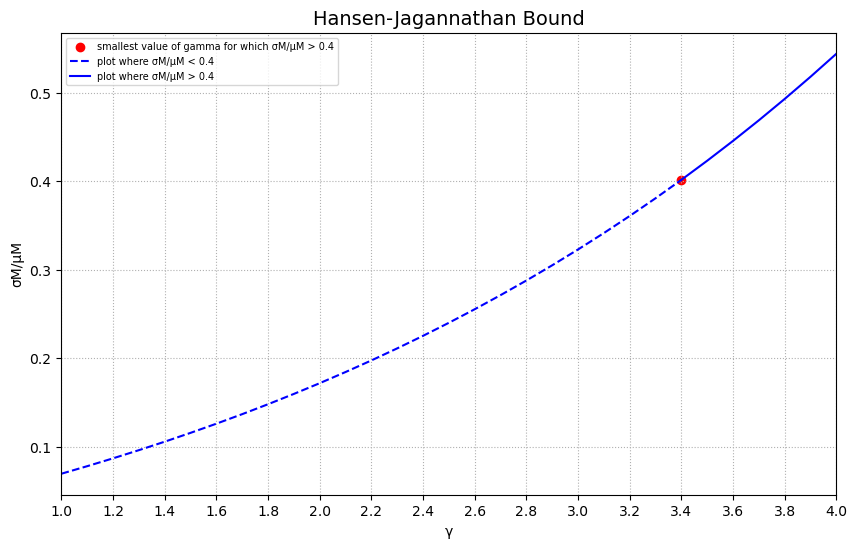

In [4]:
plt.figure(figsize=(10, 6))

# Define sharpe ratio for HJ treshold
sharpe_ratio = 0.4

# Label the axes
plt.xlabel('γ')
plt.ylabel('σM/μM')

# Find the smallest value of γ where σM/μM > 0.4
condition = HJ_bound > sharpe_ratio
SM_idx = np.min(np.argwhere(HJ_bound>sharpe_ratio))
treshold_gamma = gamma[SM_idx]

# Find the HJ bound smallest value >0.4
treshold_HJ = HJ_bound[np.min(np.argwhere(HJ_bound >sharpe_ratio))]

gamma_ns, HJ_bound_ns = gamma[:SM_idx+1], HJ_bound[:SM_idx+1]
gamma_s, HJ_bound_s = gamma[SM_idx:], HJ_bound[SM_idx:]

# Plot points where σM/μM > 0.4
plt.scatter(treshold_gamma, treshold_HJ , color='red', label='smallest value of gamma for which σM/μM > 0.4')

# plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).
plt.plot(gamma_ns,HJ_bound_ns,color='blue',linestyle='--',label='plot where σM/μM < 0.4')
plt.plot(gamma_s,HJ_bound_s, color='blue',label='plot where σM/μM > 0.4')

# Set the X-axis ticks with an increment of 0.1
plt.xticks(np.arange(min(gamma_ns), max(gamma_s), 0.2))
plt.xlim(min(gamma_ns), max(gamma_s))

plt.grid(True, linestyle='dotted')
plt.title('Hansen-Jagannathan Bound',fontsize=14)
plt.legend(loc='upper left', fontsize=7)

In [5]:
print(f'smallest gamma of treshold = {treshold_gamma}' )

smallest gamma of treshold = 3.400000000000002


## Economic Significance:

### H–J bound: volatility ratio of pricing kernel must exceed Sharpe ratio of 0.4 for US stock market

### For investor with power utility of consumption, investor's coefficient of relative risk aversion (γ) affects volatility of pricing kernel ⇒ H–J bound sets lower bound on γ

### H–J bound is satisfied for reasonable value of γ when probability distribution of consumption growth includes rare disasters ⇒ no equity premium puzzle